# Data science pipeline: pandas, seaborn, scikit-learn
*From the video series: [Introduction to machine learning with scikit-learn](https://github.com/justmarkham/scikit-learn-videos)*

## Agenda

- How do I use the **pandas library** to read data into Python?
- How do I use the **seaborn library** to visualize data?
- What is **linear regression**, and how does it work?
- How do I **train and interpret** a linear regression model in scikit-learn?
- What are some **evaluation metrics** for regression problems?
- How do I choose **which features to include** in my model?

## Types of supervised learning

- **Classification:** Predict a categorical response
- **Regression:** Predict a continuous response

## Reading data using pandas

**Pandas:** popular Python library for data exploration, manipulation, and analysis

- Anaconda users: pandas is already installed
- Other users: [installation instructions](http://pandas.pydata.org/pandas-docs/stable/install.html)

In [1]:
# inserted cell

import numpy as np
import pandas as pd

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# read CSV file and save the results
data = pd.read_csv('data/Boston.csv')

# display the first 5 rows
data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [3]:
?pd.read_csv

In [4]:
data = pd.read_csv('data/Boston.csv', usecols=[1,2,3])
data.head()

,zn,indus,chas
0,18.0,2.31,0
1,0.0,7.07,0
2,0.0,7.07,0
3,0.0,2.18,0
4,0.0,2.18,0


In [5]:
# read CSV file and save the results
data = pd.read_csv('data/Boston.csv')

# display the first 5 rows
data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


Primary object types:

- **DataFrame:** rows and columns (like a spreadsheet)
- **Series:** a single column

In [6]:
# display the last 5 rows
data.tail()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0,0.573,6.030,80.8,2.5050,1,273,21.0,396.90,7.88,11.9


In [7]:
# check the shape of the DataFrame (rows, columns)
data.shape

(506, 14)

##### What are the features?
- **rm:** average number of rooms per house
- **age:** average age of houses
- **lstat:** percent of households with lower socioeconomic status (percent)

What is the response?
- **medv:** median value of owner-occupied homes (in $1000s)

What else do we know?
- Because the response variable is quantitative(numerical, discrete), this is a **regression** problem.
- There are 506 **observations** (represented by the rows).

## Visualizing data using seaborn

**Seaborn:** Python library for statistical data visualization built on top of Matplotlib

- Anaconda users: installed (since version 4.3.0 dated 2017-01-31)
- Other users: [installation instructions](http://stanford.edu/~mwaskom/software/seaborn/installing.html)

In [8]:
# conventional way to import seaborn
# import seaborn as sns

# allow plots to appear within the notebook
# %matplotlib inline

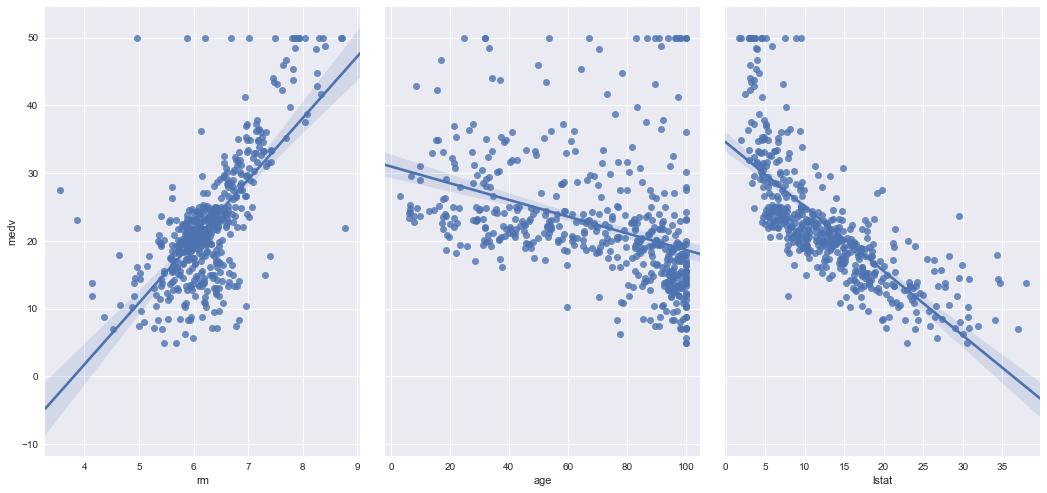

In [9]:
# visualize the relationship between the features and the response using scatterplots
sns.pairplot(data, x_vars=['rm','age','lstat'], y_vars='medv', size=7, aspect=0.7, kind='reg')

# Linear regression

**Pros:** fast, no tuning required, highly interpretable, well-understood

**Cons:** unlikely to produce the best predictive accuracy (presumes a linear relationship between the features and response)

### Form of linear regression

$y = \beta_0 + \beta_1x_1 + \beta_2x_2 + ... + \beta_nx_n$

- $y$ is the response
- $\beta_0$ is the intercept
- $\beta_1$ is the coefficient for $x_1$ (the first feature)
- $\beta_n$ is the coefficient for $x_n$ (the nth feature)

In this case:

$y = \beta_0 + \beta_1 \times rm + \beta_2 \times age + \beta_3 \times lstat$

The $\beta$ values are called the **model coefficients**. These values are "learned" during the model fitting step using the "least squares" criterion. Then, the fitted model can be used to make predictions!

<br><br> 
# Simple Linear regression


### Form of simple linear regression

$y = \beta_0 + \beta_1x_1 $

- $y$ is the response
- $\beta_0$ is the intercept
- $\beta_1$ is the coefficient for $x_1$ (the first feature)  

<br><br>
### Simple linear regression of  medv (response) onto lstat (predictor). 

##### What are the features?
- **lstat:** percent of households with lower socioeconomic status (percent)

###### What is the response?
- **medv:** median value of owner-occupied homes (in $1000s)

$y = \beta_0 + \beta_1 \times lstat$

The $\beta$ values are called the **model coefficients**. These values are "learned" during the model fitting step using the "least squares" criterion. Then, the fitted model can be used to make predictions!

## Preparing X and y using pandas

- scikit-learn expects X (feature matrix) and y (response vector) to be NumPy arrays.
- However, pandas is built on top of NumPy.
- Thus, X can be a pandas DataFrame and y can be a pandas Series!

In [10]:
# create a Python list of feature names
feature_cols = ['lstat']

# use the list to select a subset of the original DataFrame
X = data[feature_cols]

# equivalent command to do this in one line
X = data[['lstat']]

# print the first 5 rows
X.head()

,lstat
0,4.98
1,9.14
2,4.03
3,2.94
4,5.33


In [11]:
# check the type and shape of X
print(type(X))
print(X.shape)

<class 'pandas.core.frame.DataFrame'>
(506, 1)


In [12]:
# select a Series from the DataFrame
y = data['medv']

# equivalent command that works if there are no spaces in the column name
y = data.medv

# print the first 5 values
y.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: medv, dtype: float64

In [13]:
# check the type and shape of y
print(type(y))
print(y.shape)

<class 'pandas.core.series.Series'>
(506,)


## Splitting X and y into training and testing sets

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [15]:
train, test = train_test_split(data, train_size=0.75, random_state=1)

In [16]:
# default split is 75% for training and 25% for testing
print(train.shape)
print(test.shape)
train.head()

(379, 14)
(127, 14)


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
172,0.13914,0.0,4.05,0,0.510,5.572,88.5,2.5961,5,296,16.6,396.90,14.69,23.1
80,0.04113,25.0,4.86,0,0.426,6.727,33.5,5.4007,4,281,19.0,396.90,5.29,28.0
46,0.18836,0.0,6.91,0,0.448,5.786,33.3,5.1004,3,233,17.9,396.90,14.15,20.0
318,0.40202,0.0,9.90,0,0.544,6.382,67.2,3.5325,4,304,18.4,395.21,10.36,23.1


In [17]:
# default split is 75% for training and 25% for testing
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
X_train.head()

(379, 1)
(379,)
(127, 1)
(127,)


,lstat
502,9.08
172,14.69
80,5.29
46,14.15
318,10.36


## Linear regression in scikit-learn

In [18]:
# import model
from sklearn.linear_model import LinearRegression

# instantiate
linreg = LinearRegression()

# fit the model to the training data (learn the coefficients)
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

### Interpreting model coefficients

In [19]:
# print the intercept and coefficients
print(linreg.intercept_)
print(linreg.coef_)

34.1246499375
[-0.91062928]


In [ ]:
# pair the feature names with the coefficients
list(zip(feature_cols, linreg.coef_))

$y = 34.1246 - 0.9106 \times lstat$

How do we interpret the **lstat coefficient** (-0.9106)?

-  **A "unit" increase in lstat** is associated with a **0.9106 "unit" decrease in medv**.

Important notes:

- This is a statement of **association**, not **causation**.
- If an increase in lstat was associated with a **increase** in medv, $\beta_1$ would be **positive**.

### Making predictions

In [ ]:
# make predictions on the testing set
y_pred = linreg.predict(X_test)

In [ ]:
y_pred

We need an **evaluation metric** in order to compare our predictions with the actual values!

### Plot with test dat

In [ ]:
plt.figure(figsize=(5,4))
plt.scatter(X_test, y_test, marker= 'o', s=50, alpha=0.8)
plt.plot(X_test, linreg.coef_ * X_test + linreg.intercept_, 'r-')
plt.title('Least-squares linear regression')
plt.xlabel('Feature value (x)')
plt.ylabel('Target value (y)')
plt.show()

### Model evaluation metrics for regression

Evaluation metrics for classification problems, such as **accuracy**, are not useful for regression problems. Instead, we need evaluation metrics designed for comparing continuous values.

Let's create some example numeric predictions, and calculate **three common evaluation metrics** for regression problems:

In [ ]:
# define true and predicted response values
true = [100, 50, 30, 20]
pred = [90, 50, 50, 30]

**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

In [ ]:
# calculate MAE by hand
print((10 + 0 + 20 + 10)/4.)

# calculate MAE using scikit-learn
print(mean_absolute_error(true, pred))

**Mean Squared Error** (MSE) is the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

In [ ]:
# calculate MSE by hand
print((10**2 + 0**2 + 20**2 + 10**2)/4.)

# calculate MSE using scikit-learn
print(mean_squared_error(true, pred))

**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

In [ ]:
# calculate RMSE by hand

print(np.sqrt((10**2 + 0**2 + 20**2 + 10**2)/4.))

# calculate RMSE using scikit-learn
print(np.sqrt(mean_squared_error(true, pred)))

Comparing these metrics:

- **MAE** is the easiest to understand, because it's the average error.
- **MSE** is more popular than MAE, because MSE "punishes" larger errors.
- **RMSE** is even more popular than MSE, because RMSE is interpretable in the "y" units.

### Computing the RMSE for our predictions

In [ ]:
print(np.sqrt(mean_squared_error(y_test, y_pred)))

### Computing  $R^2$

In [ ]:
print(r2_score(y_test,y_pred))

In [ ]:
print(linreg.score(X_test, y_test))